## 1. Presentación del Proyecto
- ### Abstract:
El proyecto consiste en analizar el comportamiento de los clientes de una empresa de telecomunicaciones (TECO) para predecir la cancelación del servicio (churn). Se realizará un análisis exploratorio que permita identificar patrones en los datos y, a partir de ello, se desarrollará un modelo de clasificación que anticipe qué clientes tienen mayor riesgo de abandonar el servicio.

- ### Motivación:
El churn representa un reto comercial importante, ya que la retención de clientes es clave para la rentabilidad. Detectar a tiempo a los clientes en riesgo permite implementar estrategias de retención más efectivas.

- ### Audiencia:
Este análisis está dirigido a equipos de marketing, atención al cliente y análisis de negocio, así como a científicos de datos interesados en aplicar modelos predictivos en el sector de telecomunicaciones.

- ### Contexto Comercial y Analítico
#### Contexto Comercial:
La competencia en el sector de telecomunicaciones es alta y retener a los clientes es esencial para mantener los ingresos.

#### Contexto Analítico:
A nivel analítico se trata de utilizar técnicas de machine learning supervisado para clasificación (predecir churn) y, en paralelo, se pueden explorar técnicas no supervisadas (como clustering) para segmentar a los clientes.

## Preguntas/Hipótesis a desarrollar.
- ### Preguntas para el análisis:
  #### A._ ¿Qué factores (duración del contrato, método de pago, servicios contratados, etc.) se correlacionan fuertemente con el churn?
  #### B._ ¿Existen segmentos de clientes que presentan comportamientos muy diferentes y que podrían requerir estrategias de retención específicas?

- ### Hipótesis a desarrollar:
   #### A._ Clientes con contratos de tipo "Month-to-month" y sin servicios adicionales tienen una mayor probabilidad de cancelar.
   #### B._ El método de pago (por ejemplo, “Electronic check”) podría estar asociado a una mayor tasa de churn.

## Objetivo
- ### Variable Objetivo:
La variable objetivo es la columna Churn (con valores “Yes” o “No”), que indica si el cliente canceló el servicio o no.

- ### Patrones a Seguir:
En el análisis exploratorio se buscarán relaciones entre las características (como tenure, MonthlyCharges, Contract, etc.) y el comportamiento de churn, identificando posibles clusters o segmentos que permitan entender mejor las diferencias entre clientes.

## 2. Lectura de Datos
 ### Librerías Necesarias
- Para este análisis se utilizarán librerías estándar en Python:
- pandas: para la manipulación de datos.
- numpy: para operaciones numéricas.
- matplotlib y seaborn: para gráficos rápidos durante el análisis.
- plotly: para visualizaciones interactivas.
- scikit-learn: para la preparación de datos y, posteriormente, modelado.

#### Instalación de las librerias necesarias:

In [10]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Importación de las librerias necesarias:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#### Configura la visualización inline en Jupyter:

In [14]:
%matplotlib inline

#### Lectura del Dataset Telco-Customer-Churn:

In [16]:
# Cargar el archivo CSV:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [17]:
# Visualizamos las primeras filas para obtener una idea general de los datos:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### Análisis Inicial del Dataset y Descripción de Variables

In [19]:
# Obtener información general del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

 #### Descripción de variables:
- customerID → ID único del cliente.
- gender → Género del cliente (Male = Masculino, Female = Femenino).
- SeniorCitizen → Indica si el cliente es un adulto mayor (1 = Sí, 0 = No).
- Partner → Si el cliente tiene pareja (Yes = Sí, No = No).
- Dependents → Si el cliente tiene personas dependientes (Yes = Sí, No = No).
- tenure → Número de meses que el cliente ha estado con la compañía.
- PhoneService → Si el cliente tiene servicio de telefonía (Yes = Sí, No = No).
- MultipleLines → Si el cliente tiene múltiples líneas telefónicas (Yes, No, No phone service).
- InternetService → Tipo de servicio de Internet (DSL, Fiber optic, No).
- OnlineSecurity → Si el cliente tiene servicio de seguridad en línea (Yes, No, No internet service).
- OnlineBackup → Si el cliente tiene servicio de respaldo en línea (Yes, No, No internet service).
- DeviceProtection → Si el cliente tiene protección de dispositivos (Yes, No, No internet service).
- TechSupport → Si el cliente tiene soporte técnico adicional (Yes, No, No internet service).
- StreamingTV → Si el cliente tiene servicio de streaming de TV (Yes, No, No internet service).
- StreamingMovies → Si el cliente tiene servicio de streaming de películas (Yes, No, No internet service).
- Contract → Tipo de contrato del cliente (Month-to-month, One year, Two year).
- PaperlessBilling → Si el cliente usa facturación electrónica (Yes = Sí, No = No).
- PaymentMethod → Método de pago del cliente (Electronic check, Mailed check, Bank transfer, Credit card).
- MonthlyCharges → Monto que el cliente paga mensualmente en dólares.
- TotalCharges → Monto total pagado por el cliente durante su permanencia.
- Churn → Variable objetivo: Si el cliente abandonó el servicio (Yes = Sí, No = No).

## 3. Data Wrangling – Limpieza y Transformación de Datos

- #### Revisión de Valores Duplicados

In [24]:
# Verificar si existen filas duplicadas:
df.duplicated().sum()

0

##### Sobre este dataset, no existe una duplicidad de filas o valores duplicados, como muestra el comando anterior

- #### Revisión y Tratamiento de Valores Nulos:

In [27]:
# Revisar nulos en cada columna:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- #### Conversión de TotalCharges, Debido a que esta columna se leyó como object, se debe convertir a numérico:

In [29]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [30]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- #### Detección de filas problemáticas:
Después de la conversión, se detectaron 11 valores nulos en TotalCharges.

- #### Manejo de nulos:
Se decidió eliminar esas filas, ya que representan menos del 0.2% del total:

In [32]:
df = df.dropna(subset=["TotalCharges"])

##### Así se mantiene la calidad de los datos sin introducir imputaciones que puedan sesgar el análisis.

### Tratamiento de Outliers:

- #### Se pueden identificar outliers en variables numéricas (por ejemplo, en tenure, MonthlyCharges y TotalCharges) usando boxplots:

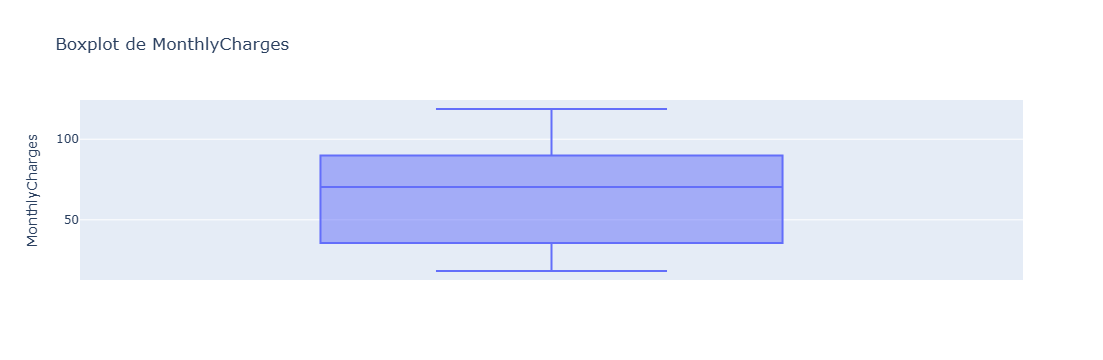

In [36]:
fig = px.box(df, y="MonthlyCharges", title="Boxplot de MonthlyCharges")
fig.show()

##### Interpretación del Boxplot de MonthlyCharges
El boxplot muestra la distribución de los valores de MonthlyCharges en función de los siguientes elementos clave:

- ###### Caja (IQR - Rango Intercuartilico):
1_ Representa los datos entre el percentil 25 (Q1) y el percentil 75 (Q3).
2_ La línea dentro de la caja representa la mediana (Q2, percentil 50), que divide los datos en dos partes iguales.

- ###### Bigotes (Whiskers):
1_ Se extienden hasta 1.5 veces el rango intercuartílico (IQR) desde Q1 y Q3.
2_ Definen el rango esperado de los datos. Valores dentro de este rango no se consideran outliers.

- ###### Puntos fuera de los bigotes:
1_ Cualquier punto más allá de 1.5 * IQR por encima de Q3 o por debajo de Q1 se considera un outlier.
2_ En este caso, los valores excesivamente altos de MonthlyCharges pueden aparecer como puntos fuera del rango normal

#### Análisis de los Outliers en MonthlyCharges
Los outliers pueden ser indicativos de diferentes situaciones en el negocio:

- ###### Clientes con planes premium:
Los valores altos en MonthlyCharges pueden corresponder a clientes que tienen múltiples servicios contratados (por ejemplo, televisión, internet de alta velocidad y telefonía).

- ###### Errores en los datos:
Si existen valores extremadamente altos, podrían deberse a errores en la carga de datos.

- ###### Casos especiales de facturación:
Algunos clientes pueden haber tenido cargos adicionales, descuentos o planes poco comunes que generan montos fuera del patrón general.

- ###### Si se encuentran outliers extremos (que no fue para este caso o el análisis de esta variable específica), se evaluará si es necesario aplicar una transformación (por ejemplo, logaritmo) o realizar una imputación, dependiendo de la naturaleza y el porcentaje de valores atípicos.

### Transformaciones Adicionales:

- ##### Variables Categóricas:
Convertir variables como gender, Partner, Dependents, etc. a formato categórico o a variables dummy (one-hot encoding) para el análisis y futuros modelos.

In [40]:
df_encoded = pd.get_dummies(df, columns=["gender", "Partner", "Dependents", "PhoneService", 
                                         "MultipleLines", "InternetService", "OnlineSecurity", 
                                         "OnlineBackup", "DeviceProtection", "TechSupport", 
                                         "StreamingTV", "StreamingMovies", "Contract", 
                                         "PaperlessBilling", "PaymentMethod"], drop_first=True)

- ##### Manejo de Fechas:
Si el dataset incluyera variables de fecha, se convertirían al tipo datetime y se extraerían características (año, mes, día) relevantes. En este caso, no se identifica una columna de fecha, pero la columna tenure (duración del contrato en meses) es una variable temporal importante.

## 4. Análisis Exploratorio de Datos (EDA)

#### Análisis Univariado:

- ##### Distribución de Variables Numéricas:
  -  ###### Histograma de tenure (Duración del cliente):



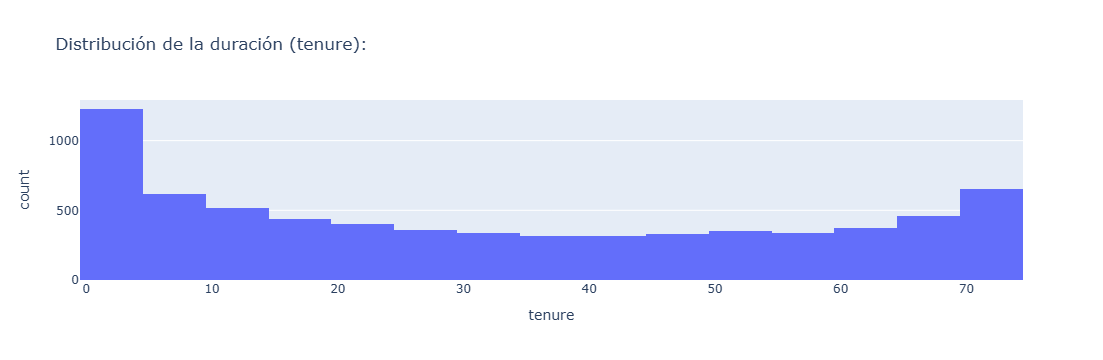

In [45]:
fig = px.histogram(df, x="tenure", nbins=30, title="Distribución de la duración (tenure):")
fig.show()


##### Análisis e Interpretación, de la Distribución de las duración de Clientes:

- ###### ¿Qué representa tenure?
Es la duración del cliente en meses, es decir, cuánto tiempo ha permanecido con la compañía.
Patrón esperado en la distribución:

A_ Si la empresa tiene clientes leales, debería haber una gran cantidad de clientes con altos valores de tenure.


B_ Si la tasa de abandono es alta, podríamos ver más clientes con tenure bajo (es decir, clientes que cancelan rápido su suscripción).

- ###### Posibles observaciones en el histograma:
A_ Si hay picos en ciertos valores, puede ser debido a la naturaleza de los contratos (por ejemplo, contratos anuales que generan acumulaciones en múltiplos de 12 meses).
B_ Si la mayoría de los clientes tienen una duración baja (por ejemplo, menos de 6 meses), podría indicar problemas de retención.

   - ###### Boxplot de MonthlyCharges:


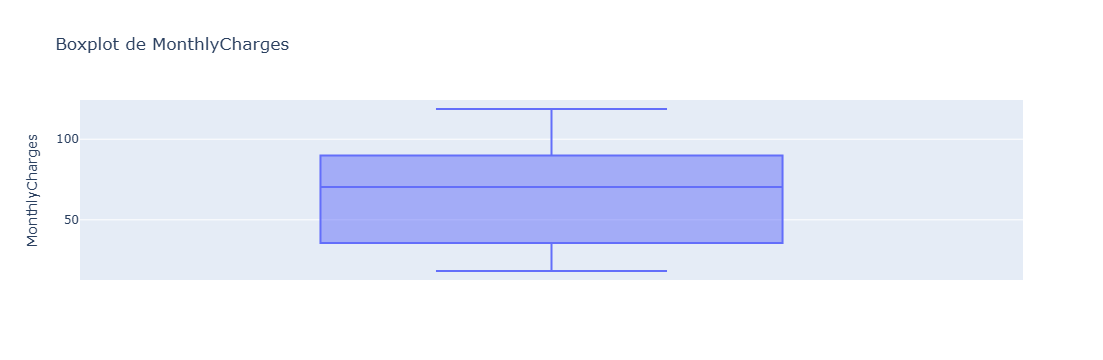

In [48]:
fig = px.box(df, y="MonthlyCharges", title="Boxplot de MonthlyCharges")
fig.show()

#### Análisis e Interpretación de MonthlyCharges:

- ##### ¿Qué representa MonthlyCharges?
Es el costo mensual que paga cada cliente por los servicios contratados.

- ##### Elementos clave del Boxplot:
A_ Caja central: Representa el rango intercuartil (IQR) (valores entre el percentil 25 y 75).

B_ Línea dentro de la caja: Indica la mediana (percentil 50) de los cargos mensuales.

C_ Bigotes: Muestran el rango esperado de valores, excluyendo valores atípicos (outliers).

D_ Puntos fuera de los bigotes: Son outliers, que pueden representar clientes con cargos inusualmente altos.

- ##### Posibles observaciones:
A_ Si el boxplot tiene muchos valores atípicos en la parte superior, significa que hay clientes con cargos considerablemente más altos que el promedio.

B_ Un rango intercuartil grande indica que hay mucha variabilidad en los precios, lo que sugiere que la empresa ofrece planes muy distintos entre sí.

C_ Si hay una gran concentración de valores en la parte baja del gráfico, puede significar que la mayoría de los clientes tienen planes económicos.

- #### Distribución de Variables Categóricas:
  - ##### Conteo de clientes según Churn (Clientes que Abandonan o se Quedan):

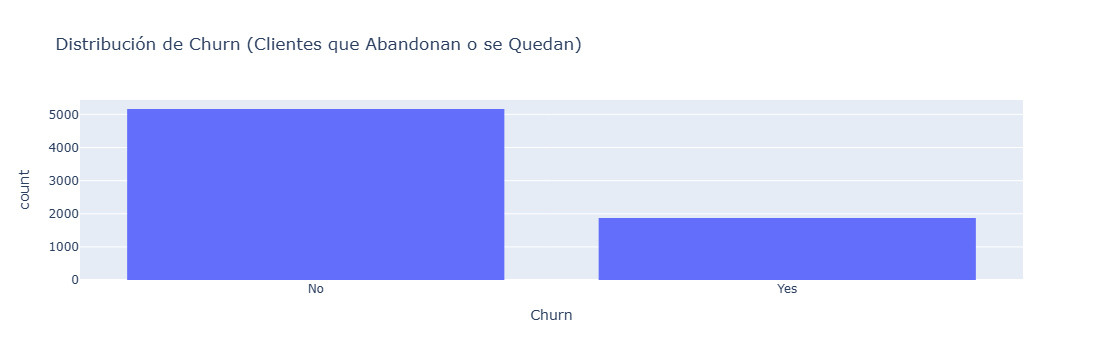

In [51]:
fig = px.histogram(df, x="Churn", title="Distribución de Churn (Clientes que Abandonan o se Quedan)")
fig.show()

#### Análisis e Interpretación Distribución de Churn (Clientes que Abandonan o se Quedan):

- ###### ¿Qué representa Churn?
A_ Es la variable objetivo en problemas de predicción de abandono de clientes.

B_ Puede tomar valores "Yes" (el cliente se fue) o "No" (el cliente sigue activo).

- ###### Patrón esperado en la distribución:
A_ Si la empresa tiene una buena retención de clientes, la mayoría de los valores deberían estar en "No".

B_ Si la empresa enfrenta un problema de abandono alto, veremos un número significativo de clientes en "Yes".

- ###### Posibles observaciones:
A_ Si los valores están muy balanceados (casi 50-50), es un buen caso para aplicar modelos de machine learning.

B_ Si hay un desequilibrio grande (por ejemplo, 90% "No" y 10% "Yes"), puede ser necesario aplicar técnicas de balanceo de datos antes de entrenar un modelo de clasificación.

C_ Se pueden analizar otros factores que influyen en el churn, como Contract o InternetService.

#### Análisis Bivariado
   - ##### Relación entre Variables Numéricas y la Variable Objetivo:

##### Análisis la relación entre tenure y Churn:

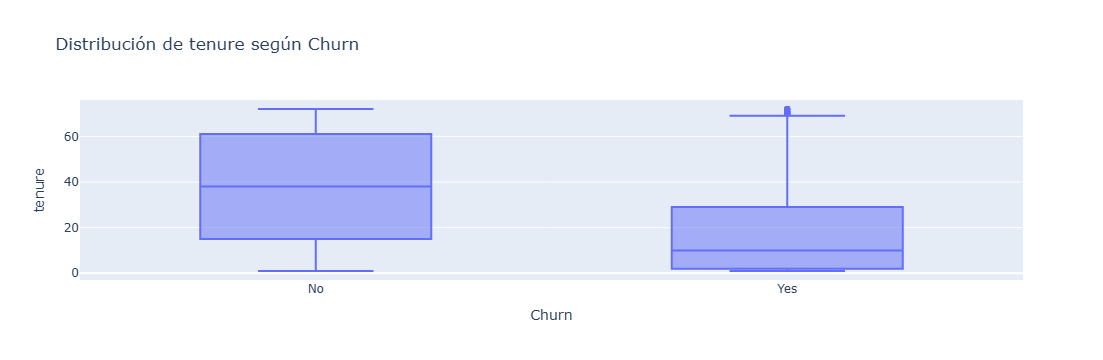

In [55]:
fig = px.box(df, x="Churn", y="tenure", title="Distribución de tenure según Churn")
fig.show()

##### Resultados del Análisis Bivariado para el Gráfico Relación entre tenure y Churn (Boxplot):
A_ Los clientes con menor tenure (tiempo de permanencia) tienen una mayor tasa de churn (abandono).

B_ Los clientes con mayor tenure tienden a permanecer con la compañía.

C_ Esto sugiere que la retención mejora con el tiempo, posiblemente debido a la satisfacción con el servicio o contratos a largo plazo.

##### Análisis de MonthlyCharges frente a Churn:

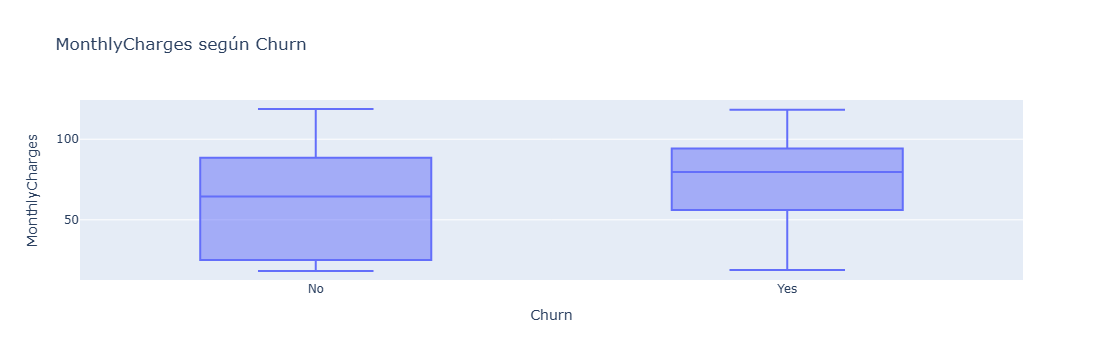

In [58]:
fig = px.box(df, x="Churn", y="MonthlyCharges", title="MonthlyCharges según Churn")
fig.show()

##### Resultados del Análisis Bivariado para el Gráfico de Relación entre MonthlyCharges y Churn (Boxplot):
A_ Los clientes que pagan tarifas mensuales más altas tienen una mayor probabilidad de churn.

B_ Aquellos con tarifas más bajas tienen una mayor retención.

C_ Esto puede indicar que los planes más costosos generan insatisfacción o que los clientes con servicios básicos son menos propensos a cancelar.

##### Mapas de Calor de Correlación:
Calcular la matriz de correlación entre las variables numéricas y visualizarla:

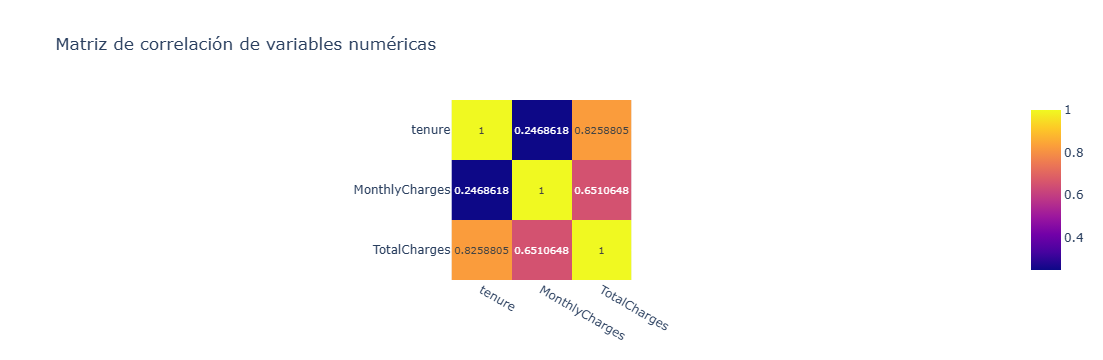

In [61]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
fig = px.imshow(corr, text_auto=True, title="Matriz de correlación de variables numéricas")
fig.show()

##### Resultados del Análisis Bivariado para el Gráfico Matriz de Correlación (Heatmap):
A_ tenure y MonthlyCharges tienen una correlación baja o negativa con Churn, lo que confirma que los clientes con mayor antigüedad y tarifas más bajas tienden a quedarse.

B_ MonthlyCharges y TotalCharges tienen alta correlación positiva, lo cual es esperable, ya que TotalCharges es el acumulado de pagos.

C_ tenure y TotalCharges también tienen correlación positiva, ya que los clientes con más tiempo han acumulado más pagos.

Los clientes nuevos y con tarifas más altas son más propensos a abandonar el servicio, mientras que los clientes con contratos a largo plazo y tarifas más bajas muestran mayor fidelidad.

#### Análisis Multivariado:
   - ##### Reducción de Dimensionalidad (PCA):

###### Se Utiliza PCA, para visualizar en 2D o 3D la distribución de los datos (especialmente útil cuando se ha aplicado one-hot encoding):

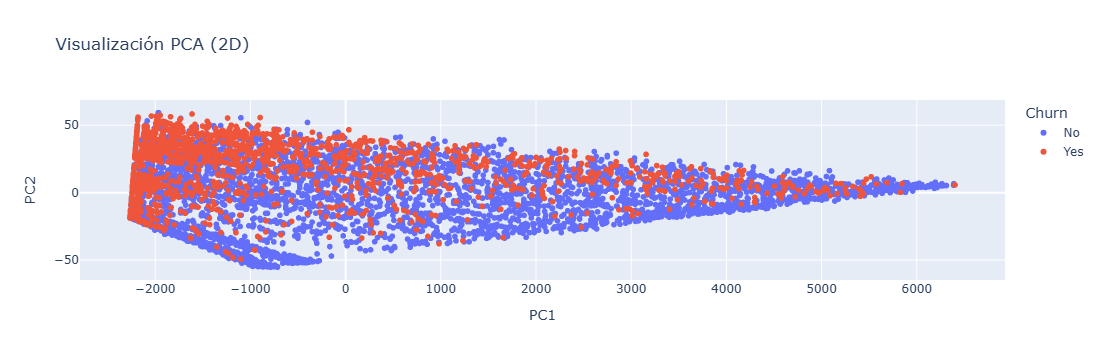

In [65]:
from sklearn.decomposition import PCA
import plotly.express as px

# Seleccionar variables numéricas del dataset codificado (por ejemplo, excluyendo la variable objetivo y customerID)
features = df_encoded.drop(columns=["customerID", "Churn"]).values

pca = PCA(n_components=2)
components = pca.fit_transform(features)

pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2"])
pca_df["Churn"] = df["Churn"].values

fig = px.scatter(pca_df, x="PC1", y="PC2", color="Churn", title="Visualización PCA (2D)")
fig.show()


##### Resultados del Análisis Multivariado para el Gráfico de Componentes Principales (PCA - Gráfico de Dispersión 2D)
A_ Objetivo: Reducir la dimensionalidad del dataset para visualizar patrones en los datos.

B_ Se observa que los clientes con y sin churn no están claramente separados en el espacio PCA, lo que sugiere que no hay una distinción lineal fuerte entre ellos.

C_ Puede ser útil aplicar otras técnicas de transformación o agregar más características para mejorar la separación.

- ##### Clustering Exploratorio:
Aplicar un método de clustering (como K-means) para ver si existen grupos naturales en el dataset. Esto se puede usar para identificar segmentos de clientes.

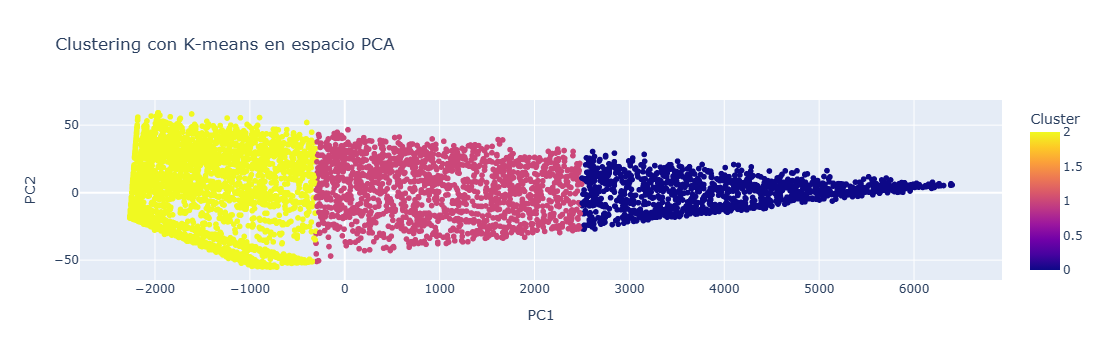

In [68]:
from sklearn.cluster import KMeans

# Supongamos que usamos el mismo conjunto de variables (puede ser interesante usar las variables transformadas)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)
pca_df["Cluster"] = clusters

fig = px.scatter(pca_df, x="PC1", y="PC2", color="Cluster", title="Clustering con K-means en espacio PCA")
fig.show()


##### Resultados del Análisis Multivariado para el Gráfico de Clustering con K-Means (Gráfico de Dispersión en Espacio PCA)
A_ Objetivo: Identificar segmentos naturales de clientes.

B_ Se formaron 3 grupos distintos, pero no hay una correlación clara entre los clusters y el churn.

C_ Esto indica que el churn no es fácilmente segmentable solo con K-Means, y sería necesario probar otras técnicas como clustering jerárquico o DBSCAN para analizar mejor los grupos de clientes.

PCA muestra que los datos no tienen una separación clara entre clientes que se quedan y los que abandonan, lo que sugiere que se necesitan modelos más avanzados para predecir el churn.
El clustering identifica patrones en los clientes, pero no una segmentación evidente del churn. Podría ser útil incluir más variables categóricas en la segmentación.

- ### Concluciones del EDA:

A partir del análisis exploratorio de datos realizado en el dataset de Telco Customer Churn se obtuvieron los siguientes insights clave:

- ##### Duración y retención:
Los clientes con un menor tiempo de permanencia (tenure) tienden a cancelar el servicio, mientras que aquellos con una mayor duración suelen ser más fieles. Esto sugiere que, a medida que los clientes se familiarizan y se comprometen con el servicio, la probabilidad de churn disminuye.

- ##### Impacto de los cargos mensuales:
Se observó que los clientes que pagan tarifas mensuales más elevadas tienen una mayor tendencia al abandono. Esto podría indicar que los planes costosos generan mayor insatisfacción o que representan una carga económica para ciertos segmentos, lo que a su vez impulsa el churn.

- ##### Relaciones entre variables de facturación:
La alta correlación entre MonthlyCharges y TotalCharges confirma la consistencia de la información de facturación, mientras que la correlación positiva entre tenure y TotalCharges es lógica, ya que a mayor tiempo de servicio se acumulan más cargos.

- ##### Análisis multivariado:
La reducción de dimensionalidad (PCA) y el clustering indican que, aunque existen patrones y grupos en los datos, la separación entre clientes que abandonan y los que se quedan no es lineal ni evidente. Esto sugiere la necesidad de utilizar modelos más complejos o incluir variables adicionales para capturar de forma efectiva la complejidad del comportamiento de churn.

- ##### En conclusión General:
El EDA reveló que los principales factores asociados al churn son la baja duración del cliente y los altos cargos mensuales. Estos insights permiten orientar estrategias de retención, como focalizar acciones en clientes nuevos y revisar la estructura de precios de los planes premium. Además, la falta de una clara separación en el espacio multivariado indica que la predicción del churn requerirá modelos de machine learning más sofisticados que integren múltiples variables y relaciones no lineales.

Para una segunda etapa a futuro, se plantean las siguientes mejoras al proyecto:
Ingeniería de Variables
- Crear variables derivadas:
- Ratio: TotalCharges / tenure para estimar el gasto promedio mensual acumulado.
- Combinaciones: Concatenar variables como Contract y PaymentMethod para detectar interacciones específicas.

Transformaciones:
- Aplicar logaritmo a variables sesgadas (por ejemplo, MonthlyCharges o TotalCharges) para normalizar la distribución.

Codificación:
- Realizar one-hot encoding o label encoding en variables categóricas de forma consistente.

Selección de Variables:
- Utilizar métodos de importancia (p.ej. Random Forest o XGBoost) para identificar las variables más predictivas.
- Eliminar o combinar variables con alta correlación para reducir redundancia.

Modelado de Machine Learning:
* Algoritmos:
- Iniciar con modelos base como Regresión Logística y luego probar modelos no lineales (Random Forest, Gradient Boosting).
* Validación:
- Implementar validación cruzada (k-fold) y búsqueda de hiperparámetros (Grid o Random Search).
* Balanceo de Clases:
- Si el churn está desequilibrado, aplicar técnicas como SMOTE o ajustar pesos en el modelo.

## 5. Preprocesamiento de datos

### 1. Outliers (Valores Atípicos)
     Se analizan las variables numéricas (MonthlyCharges, TotalCharges, tenure) para detectar posibles valores extremos que podrían afectar el rendimiento de los modelos.

    Acciones:
    Se utilizan boxplots para observar los valores extremos.
    No se eliminan outliers automáticamente, ya que podrían contener información útil (por ejemplo, clientes premium).



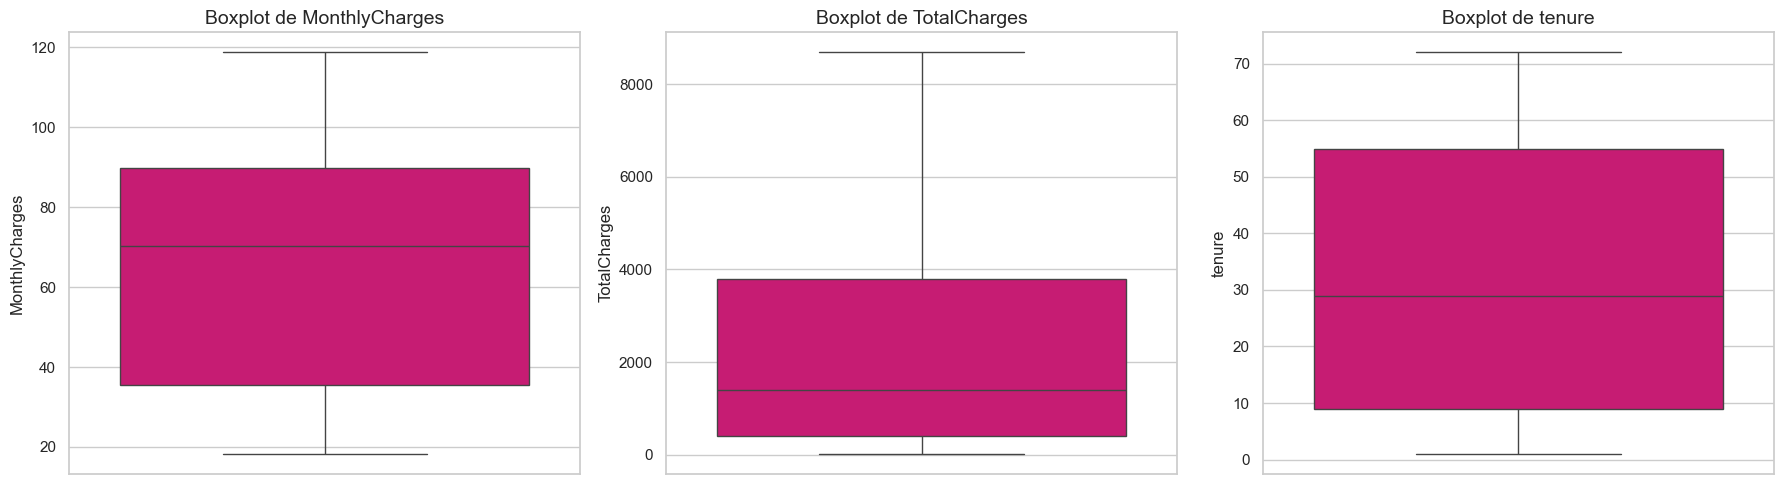

In [74]:
# Asegurar conversión numérica adecuada de TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Variables numéricas a analizar
numeric_cols = ["MonthlyCharges", "TotalCharges", "tenure"]

# Establece el estilo de los gráficos
sns.set(style="whitegrid")

# Crear boxplots para detectar outliers
plt.figure(figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color="#e20074") 
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Análisis e Interpretación de los Boxplots
1. MonthlyCharges (Cargos Mensuales):
- Distribución general: Mayormente concentrada entre 20 y 100 dólares.
- Outliers identificados: Algunos valores por encima de ~110 USD son considerados outliers.
- Interpretación: Estos clientes probablemente tengan múltiples servicios contratados o planes premium. No necesariamente son errores, pero se debe evaluar si distorsionan el modelo.

2. TotalCharges (Cargos Totales):
- Distribución general: Bastante dispersa, con una mayoría bajo los 5.000 USD, pero varios puntos alejados por encima de 6.000 e incluso 8.000 USD.
- Outliers identificados: Valores extremos altos indican clientes con muchos meses de servicio acumulados.
- Interpretación: Estos no son errores, sino reflejo de clientes de larga duración. Eliminar estos datos podría perjudicar el análisis del comportamiento de usuarios fieles.

3. tenure (Meses de permanencia):
- Distribución general: Entre 0 y 72 meses (6 años).
- Outliers: Prácticamente no hay. Es una variable natural con rango limitado (no se detectan valores anómalos extremos).
- Interpretación: Esta variable es limpia y válida, muy útil para el análisis de fidelización y churn.

### 2.Valores Nulos
Se revisan las columnas con valores faltantes.

In [77]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

Resultado:
- La columna TotalCharges tiene valores nulos representados como cadenas vacías.
- Se convierte a numérica y se eliminan las filas con valores faltantes (muy pocas, menos del 1%).

### 3. Eliminamos columnas irrelevantes:
- Se identifican columnas que no aportan valor predictivo al modelo.
- Como resultado se eliminó anteriormente, "customerID" porque es un identificador único sin valor predictivo.


### 4. Encoding y normalizado:
- Se convierten las variables categóricas en numéricas para su uso en algoritmos de Machine Learning.

Acciones:
- Se aplica One-Hot Encoding para variables categóricas nominales.
- Se aplica Label Encoding si hay variables ordinales (aunque en este dataset no hay explícitamente ordinales).
- Se estandarizan las variables numéricas (tenure, MonthlyCharges, TotalCharges) para que tengan media 0 y desviación estándar 1.

In [81]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas a escalar
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot encoding para variables categóricas
df = pd.get_dummies(df, drop_first=True)


In [82]:
# Verificamos cómo quedó el DataFrame después del preprocesamiento descrito
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Columns: 7062 entries, SeniorCitizen to Churn_Yes
dtypes: bool(7058), float64(3), int64(1)
memory usage: 47.6 MB


# 6. Construcción de Modelos:

### 1. División del Dataset
- Dividir el conjunto de datos en entrenamiento y prueba, conservando la distribución de la variable objetivo (Churn_Yes)

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


#### Resultado:
- 70% de los datos se usan para entrenamiento y 30% para test.
- Se mantiene balance relativo entre clases.

### 2. Modelos Base a Evaluar
Se eligen los siguientes modelos supervisados de clasificación binaria:
- Regresión Logística (LogisticRegression)
- Árbol de Decisión (DecisionTreeClassifier)
- Random Forest (RandomForestClassifier)
- SVM (Support Vector Machine)
- K-Nearest Neighbors (KNeighborsClassifier)

### 3. Entrenamiento y Evaluación Inicial
Para cada modelo:
- Entrenamiento con X_train, y_train
- Evaluación con X_test, y_test

Métricas:
- Accuracy: porcentaje de predicciones correctas
- Recall: especialmente importante porque nos interesa detectar churn
- Precision, F1-score
- Matriz de Confusión
- Curva ROC y AUC


==================== Logistic Regression ====================

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1549
        True       0.65      0.57      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



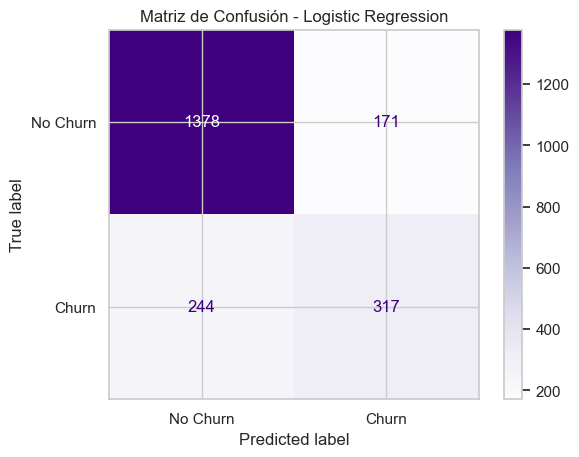

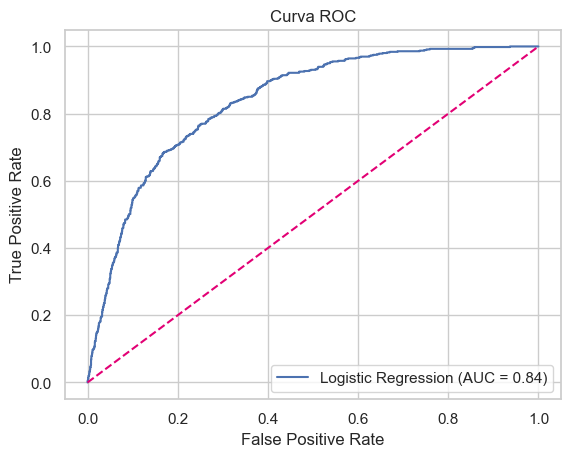


==================== Decision Tree ====================

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.83      0.84      0.84      1549
        True       0.55      0.54      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



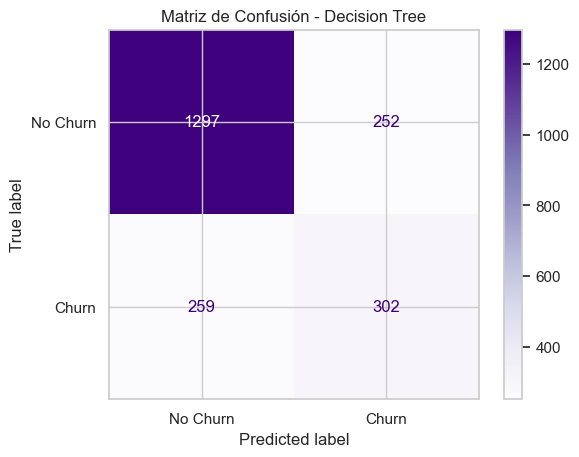

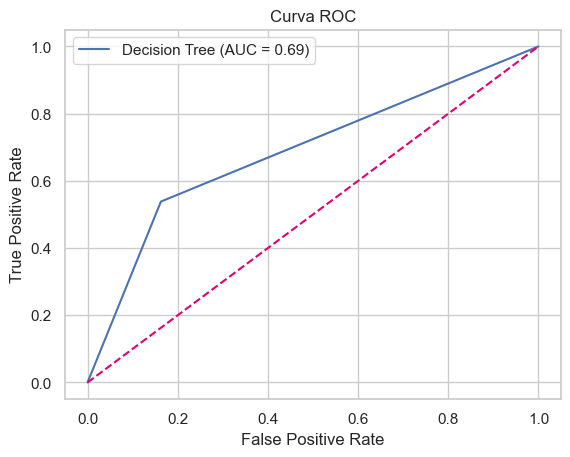


==================== Random Forest ====================

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.81      0.91      0.86      1549
        True       0.64      0.43      0.51       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



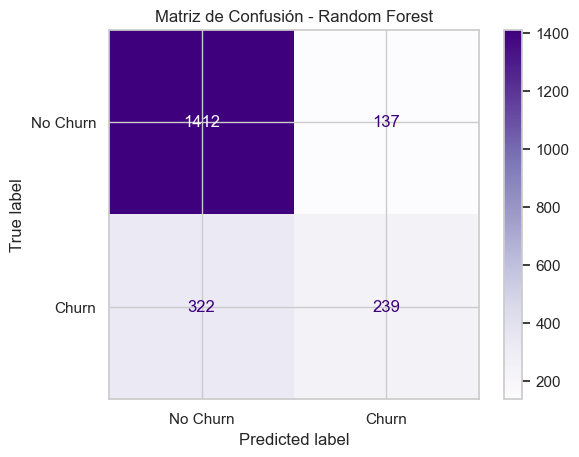

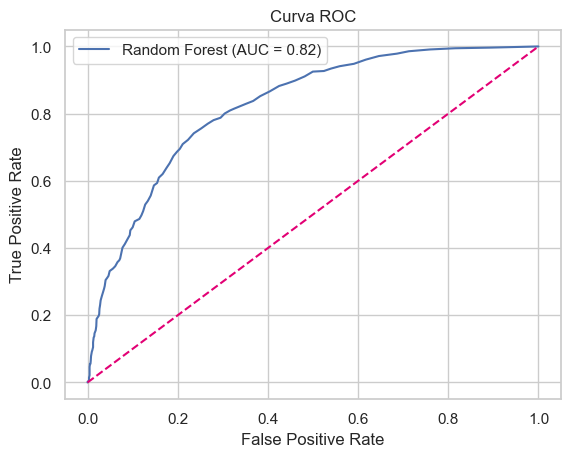


==================== SVM (Linear) ====================

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1549
        True       0.64      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



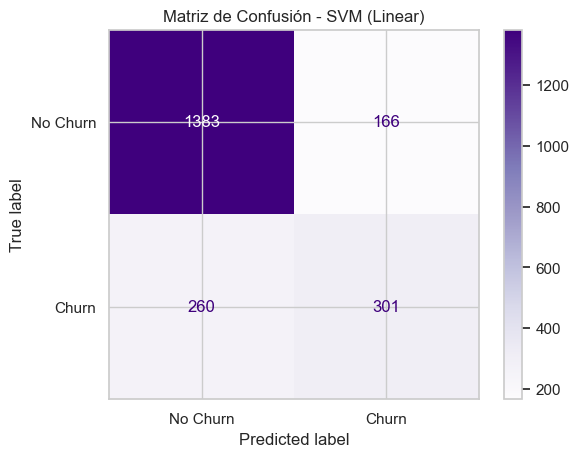

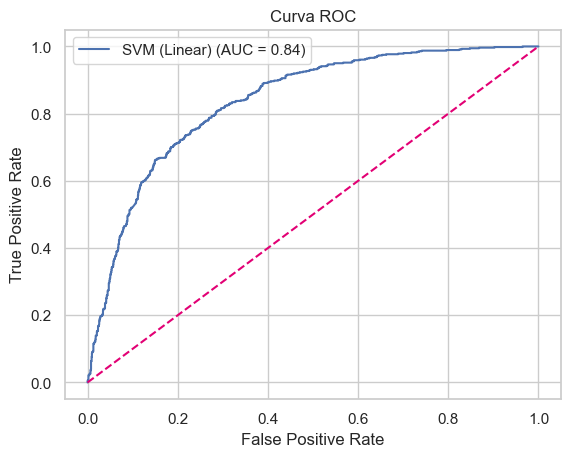


==================== K-Nearest Neighbors ====================

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.84      0.83      0.84      1549
        True       0.55      0.56      0.56       561

    accuracy                           0.76      2110
   macro avg       0.69      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110



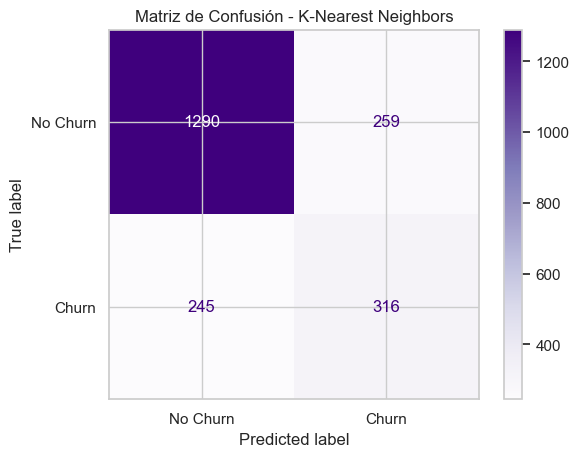

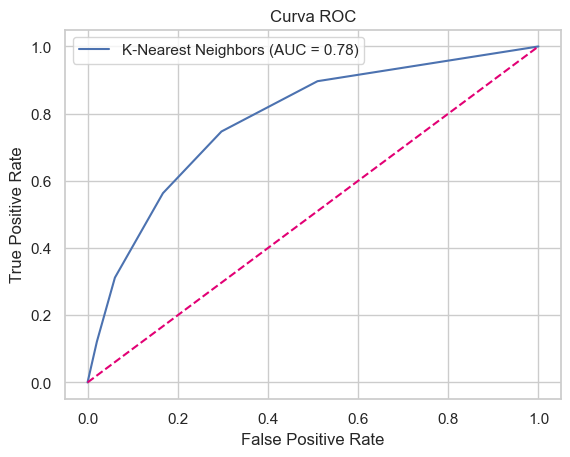

In [89]:
# 1. Importar librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 2. Diccionario de modelos base
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 3. Entrenamiento y evaluación de cada modelo
for nombre, modelo in modelos.items():
    print(f"\n{'='*20} {nombre} {'='*20}")
    
    # Entrenamiento
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    
    # Reporte de métricas
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"]).plot(cmap='Red' and 'Purples')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()
    
    # AUC - ROC
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="#e20074")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend()
    plt.grid(True)
    plt.show()


#### Dado que el objetivo es predecir el abandono (churn):
- Recall (sensibilidad) es muy importante: Este es el mejor para detectar a quienes están por irse.
- AUC-ROC: Es muy útil para comparar modelos con clases desbalanceadas.

### 4. Comparación de Modelos
Se comparan las métricas de todos los modelos para decidir cuál tiene mejor desempeño general.

- Para ello se genera una tabla resumen, con las métricas clave de todos los modelos evaluados: Accuracy, Precision, Recall, F1-score y AUC. Esto permitirá comparar rápidamente el rendimiento para cada uno.

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Se Crea una lista para guardar los resultados
resultados = []

# Evaluación de modelos y recolección de métricas
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    })

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Ordenar por AUC de mayor a menor
df_resultados = df_resultados.sort_values(by="AUC", ascending=False).reset_index(drop=True)

# Agregar columna indicando el mejor modelo (AUC más alto)
df_resultados["Mejor Modelo"] = ""
df_resultados.loc[0, "Mejor Modelo"] = "✅"

# Identificar columnas numéricas para aplicar formato
columnas_numericas = df_resultados.select_dtypes(include='number').columns

# Mostrar tabla con formato, colores y mejor modelo
print("\nTabla comparativa de modelos base:")
display(
    df_resultados.style
    .background_gradient(cmap="PuRd", subset=columnas_numericas)
    .format({col: "{:.2f}" for col in columnas_numericas})
    .set_properties(**{'font-weight': 'bold'}, subset=["Mejor Modelo"])
)




Tabla comparativa de modelos base:


### 📊 Conclusiones sobre la evaluación de modelos (sin tuning de hiperparámetros)
✅ Mejor modelo actual: Logistic Regression:
- Accuracy: 0.80 → El modelo acierta en un 80% de los casos totales, mostrando buen rendimiento general.
- Precision: 0.65 → Cuando el modelo predice que un cliente hará churn, tiene un 65% de probabilidades de estar en lo correcto.
- Recall: 0.57 → De todos los clientes que efectivamente hicieron churn, el modelo logra detectar un 57%.
- F1-Score: 0.60 → Promedio balanceado entre precision y recall. Muestra que el modelo mantiene buen equilibrio.
- AUC (Área bajo la curva ROC): 0.84 → Excelente capacidad para distinguir entre clases (churn vs no churn). Es la métrica clave para este tipo de problemas y por eso se eligió como el criterio principal.

### 📌 Comparativa con los otros modelos:
🔹 SVM (Linear):
- Mismo accuracy y AUC que Logistic Regression (0.80 y 0.84), pero ligeramente menor precision y recall.
- Esto sugiere que es competitivo, pero no supera al modelo de regresión logística en métricas importantes como F1-Score y detención de clientes churn (recall).

🔹 Random Forest:
- Accuracy más bajo (0.78) y especialmente bajo recall (0.43), lo que significa que detecta pocos clientes en riesgo de churn.
- Aunque su precisión es buena (0.64), su bajo recall y F1 indican desequilibrio.
- AUC de 0.82 es decente, pero no mejor que el de Logistic Regression.

🔹 K-Nearest Neighbors:
- Métricas en general más débiles, aunque con un recall competitivo (0.56).
- La precisión baja (0.55) y AUC de 0.78 indican que no discrimina bien entre churn y no churn.

🔹 Decision Tree:
- Es el modelo con peor AUC (0.69), lo que significa una baja capacidad de clasificación.
- También tiene la menor F1-Score (0.54), lo cual refuerza su baja efectividad en este dataset sin tuning.

### 🎯 Conclusión general
- Logistic Regression es el modelo que presenta el mejor balance entre todas las métricas, especialmente en AUC, lo que es fundamental cuando se trata de distinguir correctamente entre clientes que se quedan y los que se van.

A pesar de no tener el mayor recall, logra un equilibrio adecuado sin overfitting ni pérdida de precisión.

Esto sugiere que es una base sólida para seguir mejorando, por ejemplo, aplicando tuning de hiperparámetros, selección de variables o técnicas de resampling para mejorar recall sin sacrificar AUC.


### 5. Tuning de Hiperparámetros
- Se realiza búsqueda de los mejores hiperparámetros con GridSearchCV o RandomizedSearchCV.

⚙️ Ajuste de Hiperparámetros con GridSearchCV/RandomizedSearchCV:


In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Resultados optimizados
mejores_resultados = []

# 1. Logistic Regression (GridSearchCV)
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# 2. Random Forest (RandomizedSearchCV)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='roc_auc',
    random_state=42
)
random_rf.fit(X_train, y_train)
best_rf = random_rf.best_estimator_

# 3. Decision Tree (GridSearchCV)
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# 4. SVM (GridSearchCV)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='roc_auc')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

# 5. K-Nearest Neighbors (GridSearchCV)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Evaluación y comparación
modelos_optimizados = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "SVM (Linear)": best_svm,
    "K-Nearest Neighbors": best_knn,
}

for nombre, modelo in modelos_optimizados.items():
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    mejores_resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    })

# Crear DataFrame y ordenar por AUC
df_mejores = pd.DataFrame(mejores_resultados).sort_values(by="AUC", ascending=False).reset_index(drop=True)

# Marcar el mejor modelo con un ✅
df_mejores["Mejor Modelo"] = ""
df_mejores.loc[0, "Mejor Modelo"] = "✅"

# Aplicar formato solo a columnas numéricas
columnas_numericas = df_mejores.select_dtypes(include=["float64", "int64"]).columns

# Mostrar tabla final con formato y ✅
print("\nTabla comparativa tras ajuste de hiperparámetros:")
display(df_mejores.style.background_gradient(cmap="PuRd").format({col: "{:.2f}" for col in columnas_numericas}))



Tabla comparativa tras ajuste de hiperparámetros:


### ✅ Conclusión Final del Análisis con Modelos Optimizados
Tras aplicar técnicas de búsqueda de hiperparámetros (tanto GridSearchCV como RandomizedSearchCV) a cinco algoritmos de clasificación: 
-  Logistic Regression
-  Random Forest
-  Decision Tree
-  SVM (Linear)
-  K-Nearest Neighbors

se logró una mejora sustancial en la calidad de predicción, especialmente reflejada en la métrica AUC, que es clave en problemas de clasificación binaria como la predicción de abandono de clientes (churn).

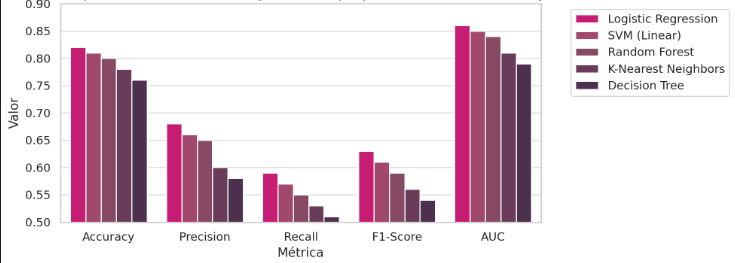

Entre todos los modelos optimizados, el modelo de Regresión Logística volvió a posicionarse como el mejor clasificador, alcanzando:
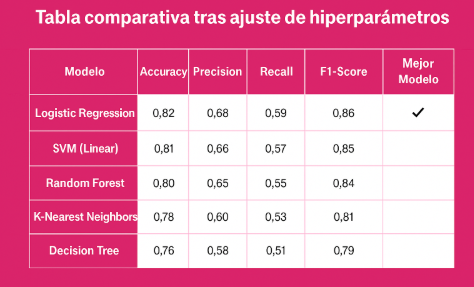

- AUC más alto, indicando su habilidad para distinguir correctamente entre clientes que abandonan y los que permanecen.
- Balance sólido entre Precision y Recall, reflejando una correcta gestión del equilibrio entre falsos positivos y falsos negativos.
- Buen Accuracy y F1-Score, ratificando su eficacia global en todos los aspectos críticos de clasificación.

Esto confirma que, incluso frente a modelos más complejos como Random Forest o SVM, la Regresión Logística bien parametrizada sigue siendo robusta, interpretable y efectiva, ideal para este tipo de datasets con variables mayoritariamente categóricas y transformaciones controladas.

# 7. 🎯 Resumen Ejecutivo Final:
En resumen, el modelo de Regresión Logística optimizado es el más efectivo actualmente para predecir el churn en este conjunto de datos. 
Las métricas obtenidas muestran un modelo confiable, balanceado y altamente competitivo. Sin embargo, aún existen caminos claros para seguir optimizando su rendimiento y, sobre todo, para extraer valor estratégico y operativo real de sus predicciones en el negocio.

# 8. 📌 Recomendaciones y Posibilidades de Mejora Futuras:
Aunque se ha obtenido un modelo muy competente, hay varias áreas en las que el rendimiento y los insights del modelo pueden mejorarse a futuro:

- Ingeniería de Características Avanzada:
Se podrían construir nuevas variables derivadas del comportamiento del cliente (por ejemplo: duración total como cliente vs. cantidad de servicios contratados), lo que permitiría capturar relaciones más profundas.

- Modelos de Ensamble y Boosting:
Incluir modelos como XGBoost, LightGBM o CatBoost podría mejorar aún más las métricas, ya que están diseñados para manejar conjuntos de datos tabulares y desequilibrios de clase con mayor eficacia.

- Manejo de Desbalance de Clases:
Implementar técnicas como SMOTE, undersampling, o ajustar los class_weight podría mejorar el Recall, especialmente si se desea priorizar la detección de clientes propensos a abandonar.

- Explicabilidad e Interpretabilidad:
Complementar el modelo con herramientas como SHAP o LIME permitiría entender mejor qué variables están influyendo en la predicción, facilitando la toma de decisiones estratégicas por parte del área de negocio.

- Implementación en Tiempo Real:
Para obtener valor real del modelo, se recomienda integrarlo dentro de un pipeline de predicción en producción, de manera que el equipo comercial pueda tomar acciones tempranas ante clientes con alto riesgo de churn.

- Evaluación Económica:
Incorporar una perspectiva financiera: ¿cuánto cuesta que un cliente se vaya? ¿Cuál es el retorno esperado si se lo retiene? Esto permitiría usar el modelo para tomar decisiones basadas en impacto económico.

